In [1]:
#add the baselines from the pyod package
from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.combination import aom
from pyod.models.copod import COPOD
from pyod.models.ecod import ECOD
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.knn import KNN
from pyod.models.lmdd import LMDD
from pyod.models.loda import LODA
from pyod.models.lof import LOF
from pyod.models.loci import LOCI
from pyod.models.lscp import LSCP
from pyod.models.mad import MAD
from pyod.models.mcd import MCD
from pyod.models.pca import PCA
from pyod.models.rod import ROD
from pyod.models.sod import SOD
from pyod.models.sos import SOS
# from pyod.models.vae import VAE
# from pyod.models.auto_encoder_torch import AutoEncoder
# from pyod.models.so_gaal import SO_GAAL
# from pyod.models.mo_gaal import MO_GAAL
from pyod.models.xgbod import XGBOD
# from pyod.models.deep_svdd import DeepSVDD

In [2]:
import pandas as pd
from pyod.models.lof import LOF
from pyod.utils.data import evaluate_print
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
from matplotlib import pyplot as plt

In [3]:
# Train dataset
df = pd.read_csv("../data/PSM/train.csv", index_col="timestamp_(min)")
df.interpolate(method ='linear', limit_direction ='forward', inplace=True)
X_train = df.values


# Test dataset
df_test = pd.read_csv("../data/PSM/test.csv", index_col="timestamp_(min)")
X_test = df_test.values

# Labels
labels = pd.read_csv("../data/PSM/test_label.csv", index_col="timestamp_(min)")
y_test = labels.values.squeeze() * (-2) + 1

In [4]:
od_dict = {
    'PCA': PCA(),
    'OCSVM': OCSVM(max_iter=1000),
    'LOF': LOF(n_jobs=3),
    'CBLOF': CBLOF(),
    # 'COF': COF(method='memory'), # inverte uma matriz muito grande
    'HBOS': HBOS(),
    'KNN': KNN(algorithm='ball_tree', n_jobs=3),
    'SOD': SOD(),
    'COPOD': COPOD(n_jobs=3),
    'ECOD': ECOD(n_jobs=3),
    # 'DeepSVDD': DeepSVDD() # deep
    # 'DeepSVDD': DeepSVDD() # deep
    # 'IForest': LODA(),
    # 'IForest': IForest(),
    # 'IForest': IForest(),
}

In [5]:
from pathlib import Path
from joblib import dump, load

PCA
===
 - Modelo já treinado, carregando...
 - Executando predições...
 - Predições realizadas...
OCSVM
=====
 - Modelo já treinado, carregando...
 - Executando predições...
 - Predições realizadas...
LOF
===
 - Modelo já treinado, carregando...
 - Executando predições...
 - Predições realizadas...
CBLOF
=====
 - Modelo já treinado, carregando...
 - Executando predições...
 - Predições realizadas...
HBOS
====
 - Treinando modelo...
 - Executando predições...
 - Predições realizadas...
KNN
===
 - Treinando modelo...
 - Executando predições...
 - Predições realizadas...
SOD
===
 - Treinando modelo...
 - Executando predições...
 - Predições realizadas...
COPOD
=====
 - Treinando modelo...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    3.2s finished


 - Executando predições...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.5s finished


 - Predições realizadas...
ECOD
====
 - Treinando modelo...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.8s finished


 - Executando predições...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.4s finished


 - Predições realizadas...


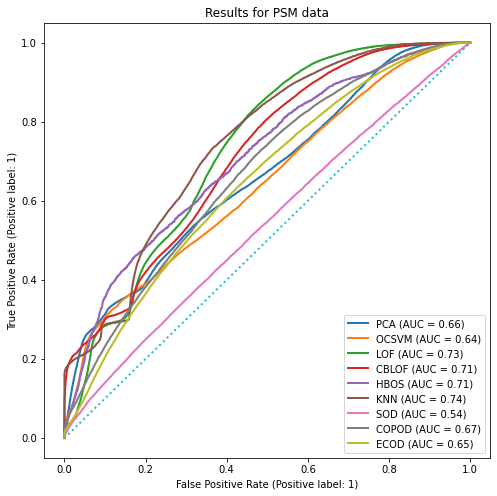

In [6]:
line_width = 2

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

for od_name, od_model in od_dict.items():
    print(f'{od_name}')
    print('=' * len(od_name))
    model_path = Path(f'../models/{od_name}.joblib')
    if model_path.exists():
        print(' - Modelo já treinado, carregando...')
        od_model = load(model_path)
    else:
        print(' - Treinando modelo...')
        od_model.fit(X_train)
        dump(od_model, model_path)
    # y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    print(' - Executando predições...')
    y_test_scores = od_model.decision_function(X_test)  # outlier scores
    print(' - Predições realizadas...')

    RocCurveDisplay.from_predictions(
        labels,
        y_test_scores,
        pos_label=1,
        name=od_name,
        linewidth=line_width,
        ax=ax
    )
plt.plot([0, 1], [0, 1], linewidth=line_width, linestyle=":")
plt.title('Results for PSM data')
plt.show()

In [7]:
y_test_scores

array([41.09015176, 34.2460235 , 37.30899471, ..., 68.32848615,
       73.25278797, 74.75748259])

In [8]:
print("\nOn Test Data:")
evaluate_print("KNN", labels, y_test_scoresa)


On Test Data:


NameError: name 'y_test_scoresa' is not defined

In [ ]:
import numpy as np

In [ ]:
np.max(y_test_scores)

10.84630744416108

In [12]:
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import check_array
from pyod.utils.utility import invert_order
from pyod.models.base import BaseDetector

In [10]:
class GRADINGS(BaseDetector):
    """Implementation of GRADINGS.

    Parameters
    ----------
    a: string, optional (default='aaa')
        faz asadsda. Asdasd.

    Attributes
    ----------

    """
    def __init__(self, a='aaa'):
        super(GRADINGS, self).__init__(contamination=contamination)
        self.a = a
    
    def fit(self, X, y=None):
        X = check_array(X)
        self.detector_ = ...
        self.detector_.fit(X=X, y=y)
        self._process_decision_scores()
        return self

    def decision_function(self, X):
        """Predict raw anomaly score of X using the fitted detector.
        The anomaly score of an input sample is computed based on different
        detector algorithms. For consistency, outliers are assigned with
        larger anomaly scores.
        Parameters
        ----------
        X : numpy array of shape (n_samples, n_features)
            The training input samples. Sparse matrices are accepted only
            if they are supported by the base estimator.
        Returns
        -------
        anomaly_scores : numpy array of shape (n_samples,)
            The anomaly score of the input samples.
        """
        check_is_fitted(self, ['decision_scores_', 'threshold_', 'labels_'])
        # Invert outlier scores. Outliers comes with higher outlier scores
        return invert_order(self.detector_.decision_function(X))


SyntaxError: unexpected EOF while parsing (353563628.py, line 2)

NameError: name 'nf' is not defined